### Explore Bike Share Data

For this project, the goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.


#### Import library

In [60]:
# Install packages
library(ggplot2)
library(lubridate)

#### Prepare Data

In [61]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [ ]:
# Adding column 'City' to 'ny'
ny$City <- 'NewYork City'
# Call
head(ny)

In [64]:
# Add `Gender` to the `wash` data frame
wash$Gender <- NA
# Add `Birth.Year` to the `wash` data frame
wash$Birth.Year <- NA
# Adding column 'City' to 'wash'
wash$City <- 'Washington'
# Call
head(wash)

In [67]:
# Adding column 'City' to 'chi'
chi$City <- 'Chicago'
# Call
head(chi)

In [69]:
# Combine into one table
main <- rbind(ny, wash, chi)
head(main)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NewYork City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NewYork City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NewYork City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NewYork City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NewYork City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NewYork City


In [70]:
# Convert type Start.Time
main$Start.Time <- ymd_hms(main$Start.Time) 

### Question 1


**Which day of week have the most ride?**

In [71]:
# Create weekday field.
main$Day.Of.Week <- wday(main$Start.Time)

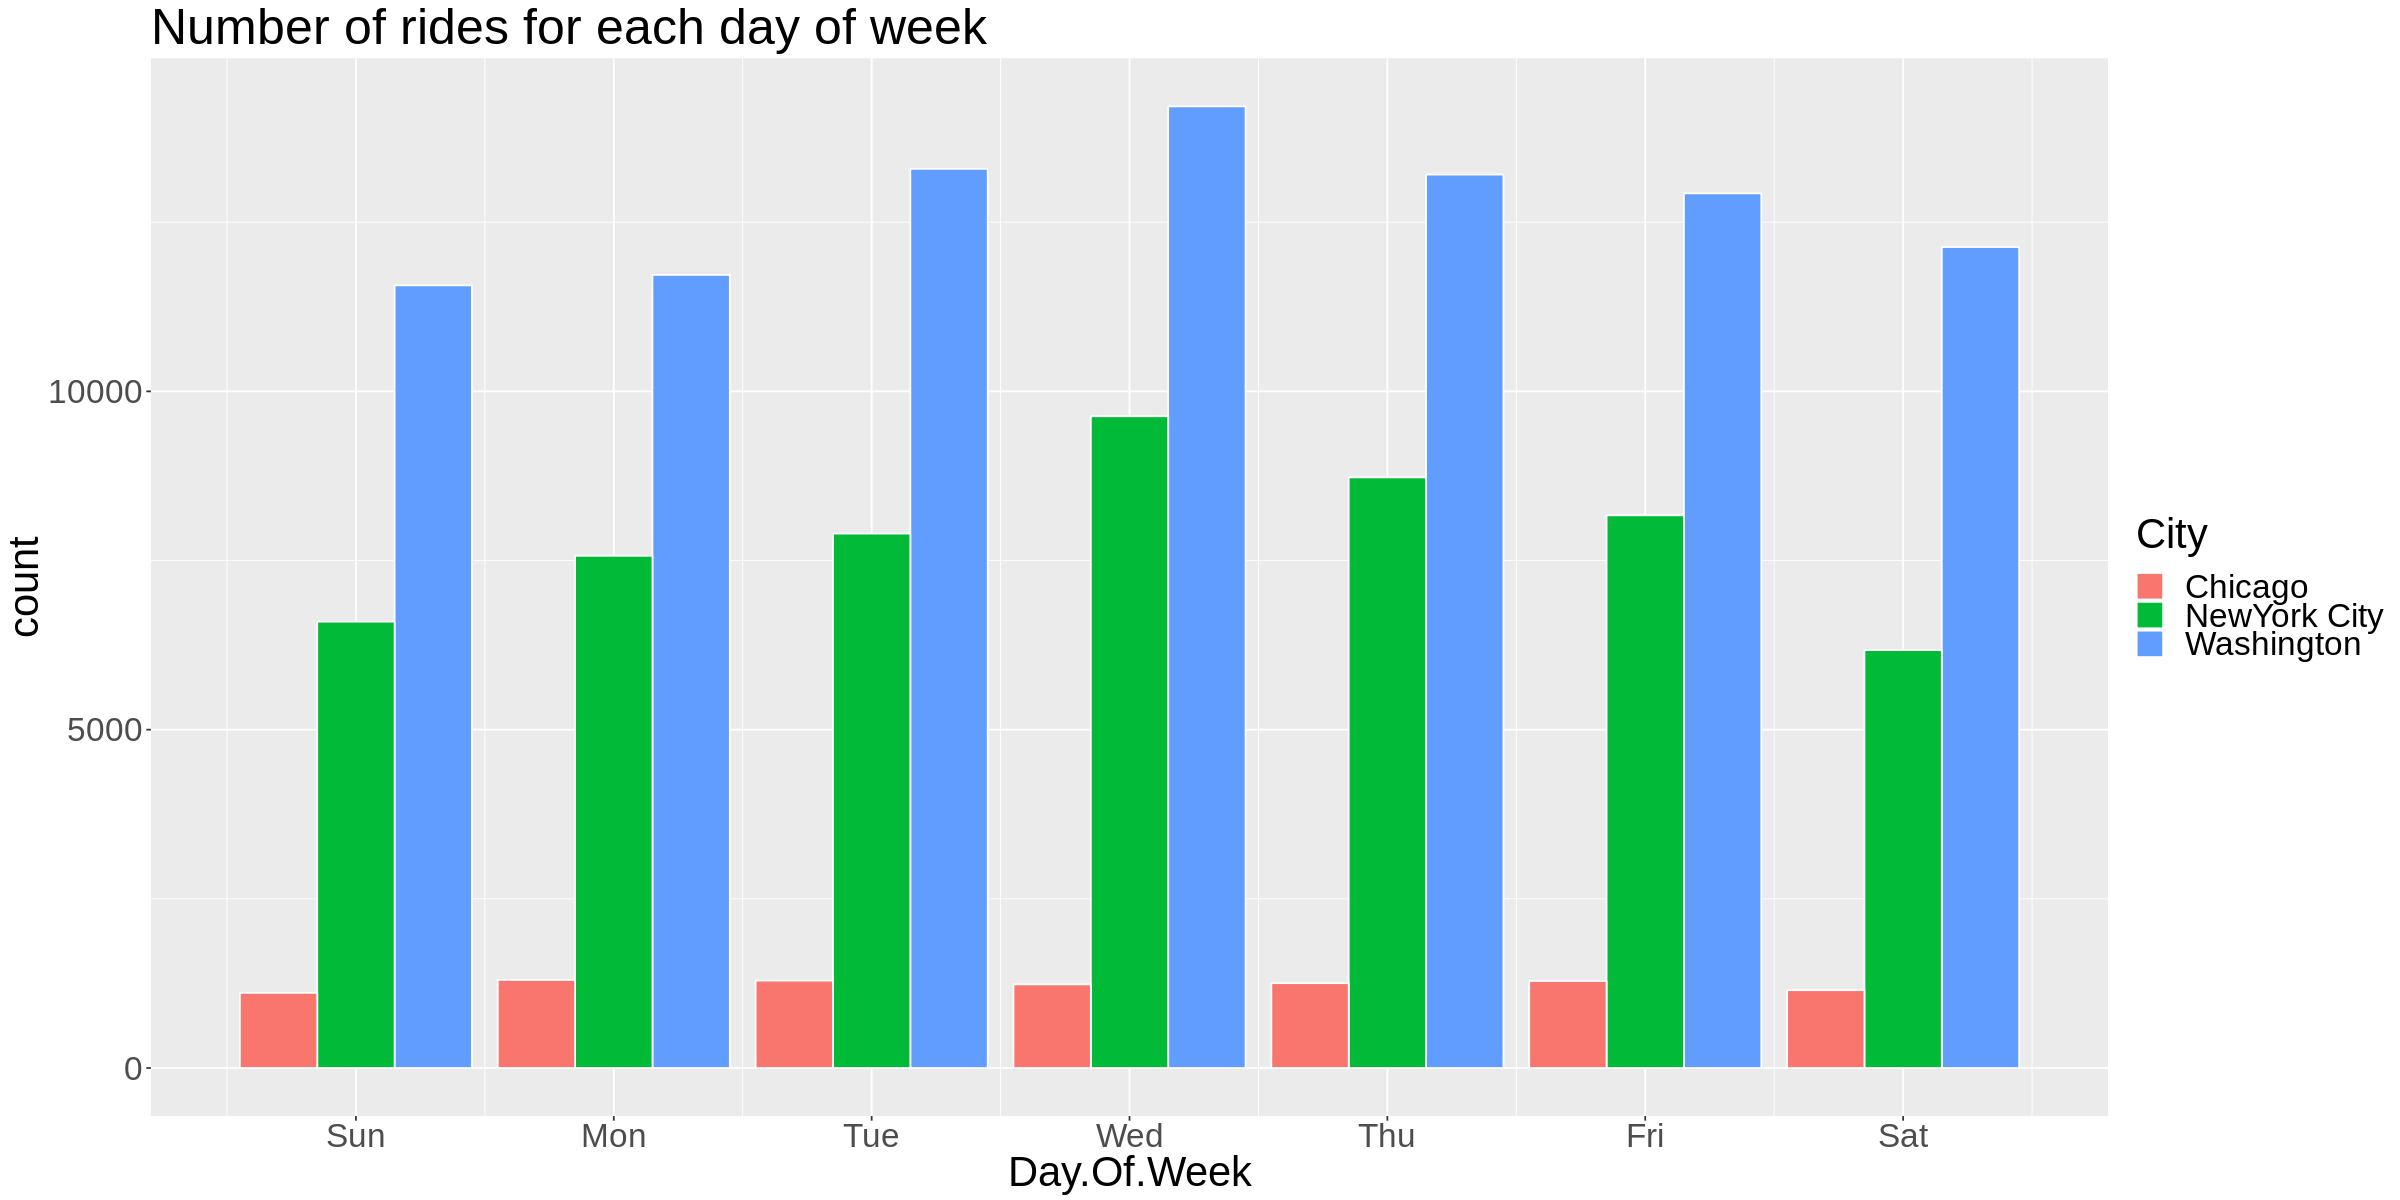

In [72]:
# Visualizing
options(repr.plot.width=20, repr.plot.height=10)
ggplot(aes(x=Day.Of.Week, fill=City), data=main) +
    geom_bar(position='dodge', na.rm=TRUE, colour="white") +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    theme(text = element_text(size = 25)) +
    ggtitle("Number of rides for each day of week")

**Summary**

- **Seem like Wednesday is the day have most rides in Washington and NewYork City.**
- **For Chicago city, we can't see much difference between days in week.**
- **In summary we can see most of the ride is forcus in the middle of the week.**

### Question 2

**Which time of the day have most ride ?**

In [73]:
# Create Hour.Of.Day field.
main$Hour.Of.Day <- strftime(main$Start.Time, format="%H")

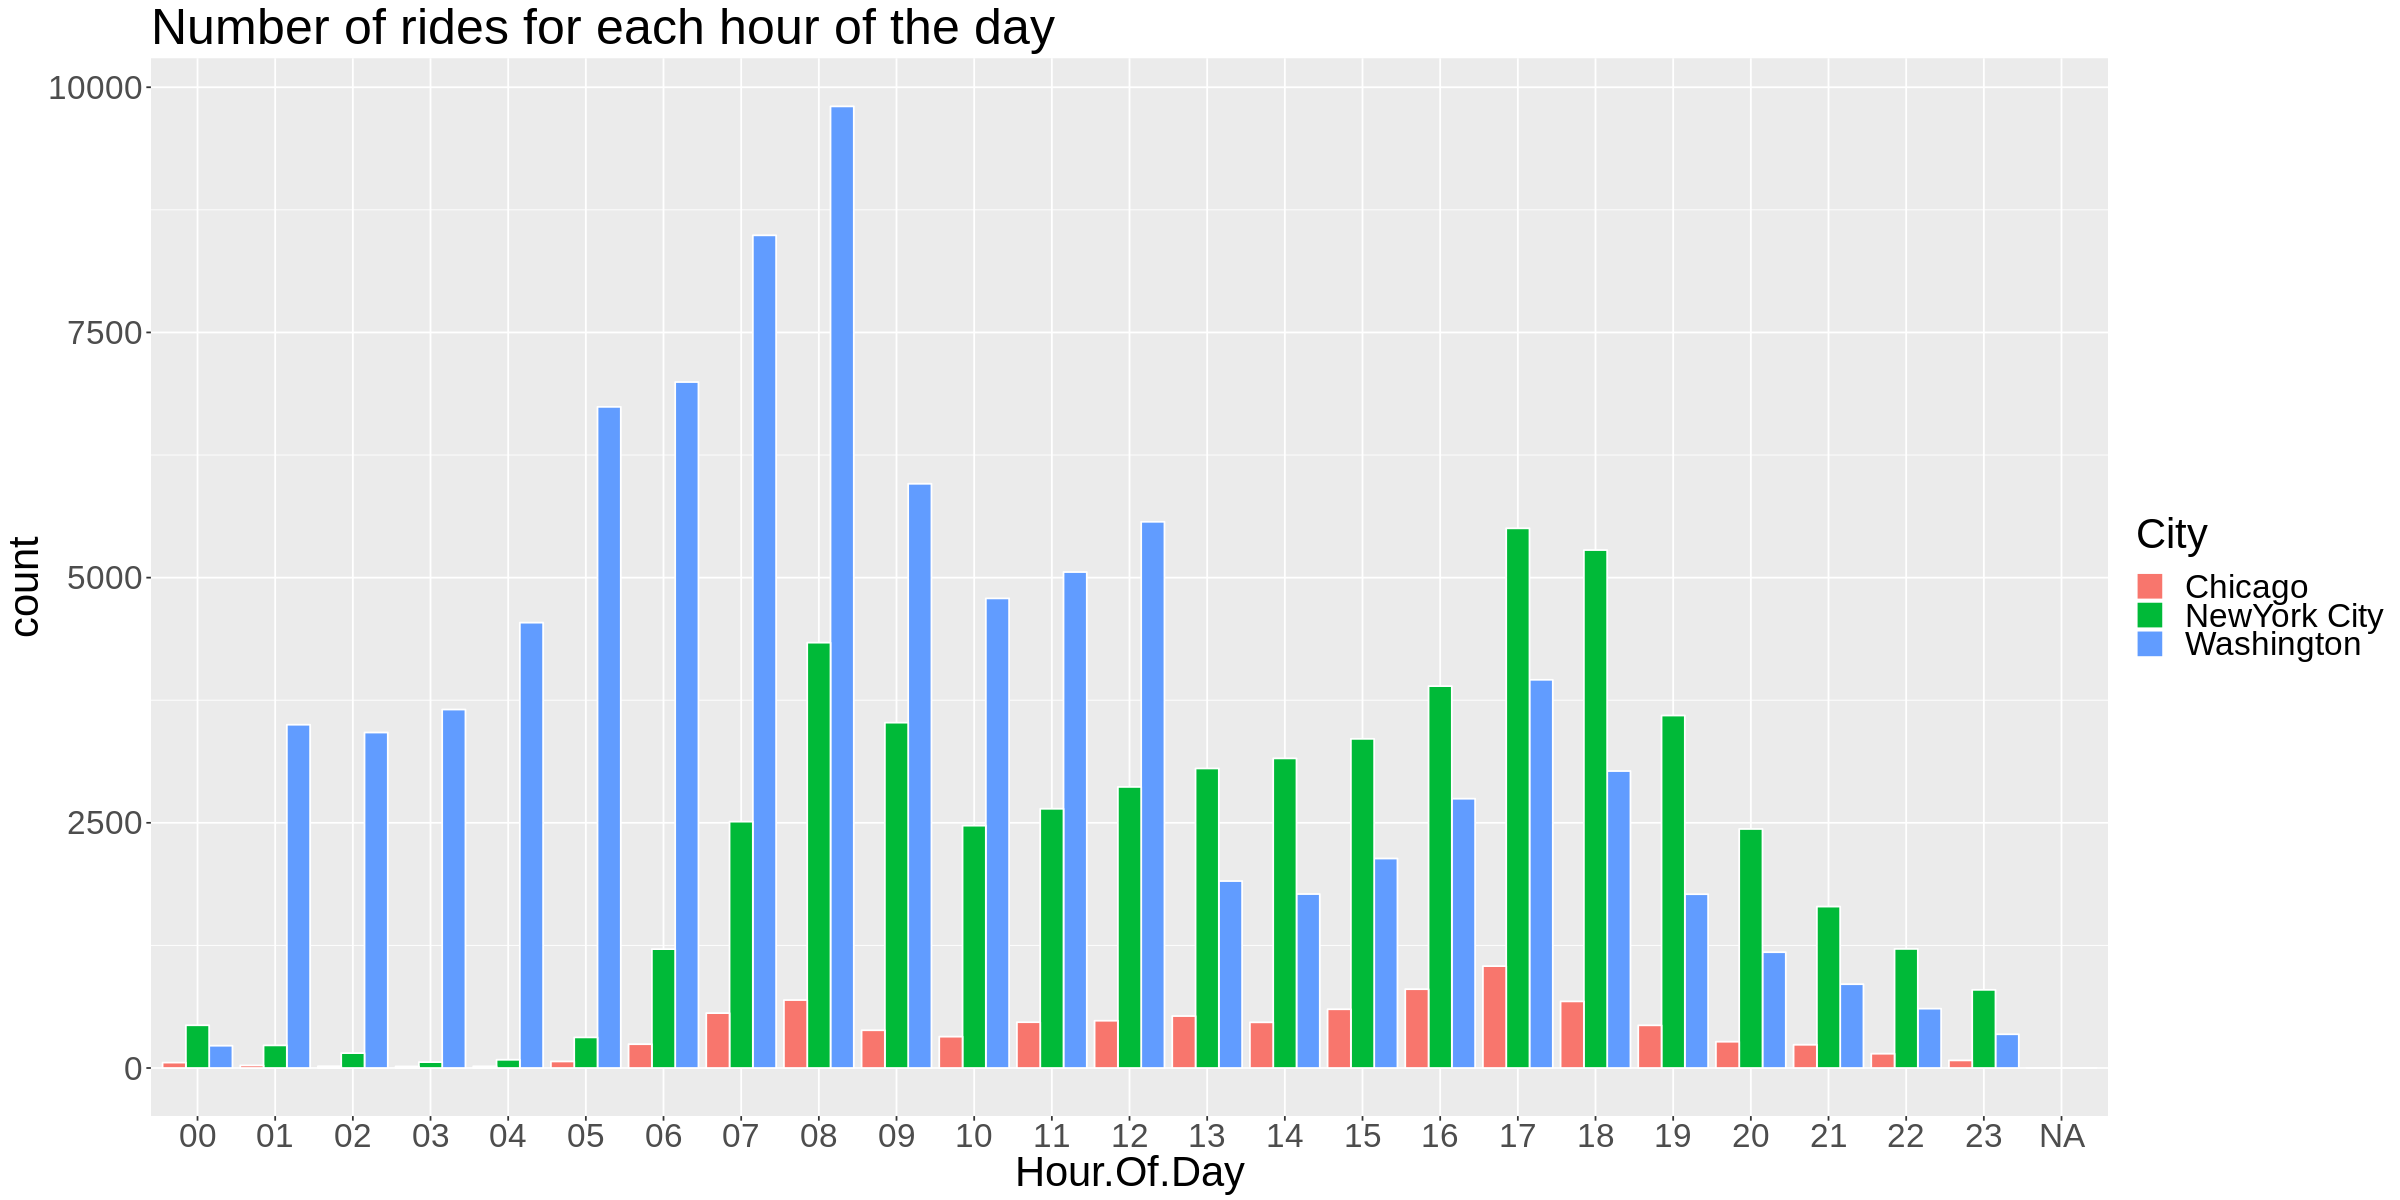

In [74]:
# Visualizing
options(repr.plot.width=20, repr.plot.height=10)
ggplot(aes(x=Hour.Of.Day, fill=City), data=main) +
    geom_bar(position='dodge', colour="white") +
    theme(text = element_text(size = 25)) +
    ggtitle("Number of rides for each hour of the day")

**Summary**

- **As expected, most of the ride focus at rush hour.**
- **The interesting point is the number of rides at Washington City is higher in the morning. In opposite, the number of rides in evening is higher than morning at Chicago and NewYork City.**

### Question 3

**What are the counts of each gender (only available for NYC and Chicago)?**

In [75]:
# Creating new main2 by combine 'NewYork City' and 'Chicago' data
main2 <- rbind(ny, chi)

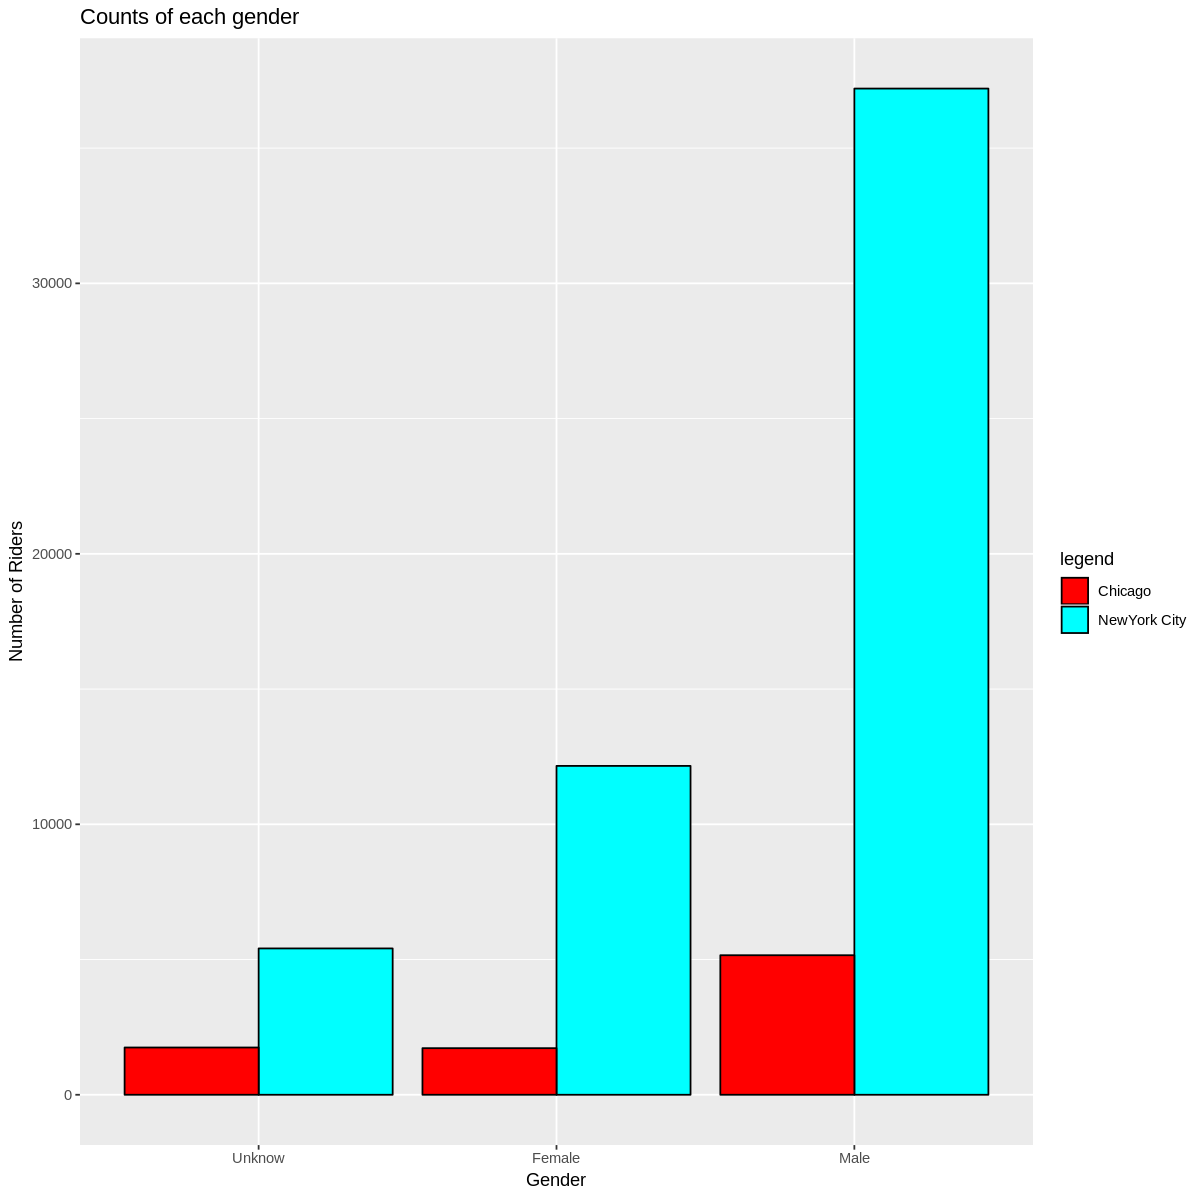

In [76]:
# Visualizing
options(repr.plot.width=10, repr.plot.height=10)
ggplot(aes(x = Gender, fill = City), data = main2) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Unknow', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("NewYork City" = "cyan", "Chicago" = "red"))

In [77]:
#Common function to count and percentage gender of city
countAndPercentangeGender <- function(main, city) {
    if (city == '') {
        # Count of Gender (Male and Female)
        count_gender = table(main$Gender)
        print(count_gender)
        # percentage of Gender (Male and Female)
        round((count_gender / length(main$Gender) * 100), digits = 2)
    } else {
        # Count of Gender(Male and Female) in city
        count_gender = table(main$Gender[main$City == city])
        # Print count_gender
        print(count_gender)
        # Percentage of Gender(Male and Female) in city
        round((count_gender / length(main$Gender[main$City == city]) * 100), digits = 2)
    }
}

In [78]:
# Count and Percentage of Gender(Male and Female) in main2
countAndPercentangeGender(main2, '')


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

In [79]:
# Count and Percentage of Gender(Male and Female) of NewYork City
countAndPercentangeGender(main2, 'NewYork City')


       Female   Male 
  5410  12159  37201 



       Female   Male 
  9.88  22.20  67.92 

In [80]:
# Count and Percentage of Gender(Male and Female) of Chicago
countAndPercentangeGender(main2, 'Chicago')


       Female   Male 
  1748   1723   5159 



       Female   Male 
 20.25  19.97  59.78 

**Summary**
- In total Chicago and New York City, divide by gender:
    + Male : 42360 (66.81%)
    + Female : 13882 (21.90%)
    + Unknow: 7158 (11.29%)
- New York City have 37.201 Male user, 12.159 Female user and 5.410 user Unknow gender.
- In Chicago have 5.159 Male user, 1.723 Female user and 1.748 user Unknow gender.
- New York city has the higher number gap between genders than Chicago. But look by percentage, the gap between genders is almost similar. About 67.92% Male, 22.20% Female for New York City and 59.78% Male, 19.97% Female for Chicago.
- The percentage of Unknow gender users in Chicago is 20.25%, which is double New York with 9.88%.


In [81]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')